In [1]:
import math
import matplotlib.pyplot as plt
import keras
import pandas as pd
import numpy as np
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout
from keras.layers import *
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split
from keras.callbacks import EarlyStopping

df=pd.read_csv("TSLA.csv")
print('Number of rows and columns:', df.shape)
df.head(5)

training_set = df.iloc[:800, [1]].values
test_set = df.iloc[800:, [1]].values

# Feature Scaling
sc = MinMaxScaler(feature_range = (0, 1))
training_set_scaled = sc.fit_transform(training_set)
# Creating a data structure with 60 time-steps and 1 output
X_train = [] #預測點的前 60 天的資料
y_train = [] #預測點

for i in range(60, 800):
    X_train.append(training_set_scaled[i-60:i, 0])
    y_train.append(training_set_scaled[i, 0])
X_train, y_train = np.array(X_train), np.array(y_train)
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
#轉成numpy array的格式
#(740, 60, 1)

model = Sequential()
#Adding the first LSTM layer and some Dropout regularisation
model.add(LSTM(units = 50, return_sequences = True, input_shape = (X_train.shape[1], 1)))
model.add(Dropout(0.2))
# Adding a second LSTM layer and some Dropout regularisation
model.add(LSTM(units = 50, return_sequences = True))
model.add(Dropout(0.2))
# Adding a third LSTM layer and some Dropout regularisation
model.add(LSTM(units = 50, return_sequences = True))
model.add(Dropout(0.2))
# Adding a fourth LSTM layer and some Dropout regularisation
model.add(LSTM(units = 50))
model.add(Dropout(0.2))
# Adding the output layer
model.add(Dense(units = 1))

# Compiling the RNN
model.compile(optimizer = 'adam', loss = 'mean_squared_error')

# Fitting the RNN to the Training set
model.fit(X_train, y_train, epochs = 10, batch_size = 32)
model.save("LSTM_model.h5")

# Getting the predicted stock price of 2017
dataset_train = df.iloc[:800, [1]]
dataset_test = df.iloc[800:, [1]]
dataset_total = pd.concat((dataset_train, dataset_test), axis = 0)
inputs = dataset_total[len(dataset_total) - len(dataset_test) - 60:].values
inputs = inputs.reshape(-1,1)
inputs = sc.transform(inputs)
X_test = []

before_day=60
=459
total_day=time_step+1
for i in range(60,520): #(60+459+1  1為預測未來1天)
    X_test.append(inputs[i-60:i, 0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
print(y_train.shape)
print(X_test.shape)
# (459, 60, 1)

predicted_stock_price = model.predict(X_test)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)

print(predicted_stock_price.shape)


Number of rows and columns: (1259, 7)
Epoch 1/10
24/24 [==============================] - 3s 109ms/step - loss: 0.0614
Epoch 2/10
24/24 [==============================] - 2s 100ms/step - loss: 0.0149
Epoch 3/10
24/24 [==============================] - 2s 99ms/step - loss: 0.0118
Epoch 4/10
24/24 [==============================] - 2s 103ms/step - loss: 0.0123
Epoch 5/10
24/24 [==============================] - 2s 103ms/step - loss: 0.0119
Epoch 6/10
24/24 [==============================] - 3s 135ms/step - loss: 0.0115
Epoch 7/10
24/24 [==============================] - 3s 125ms/step - loss: 0.0122
Epoch 8/10
24/24 [==============================] - 3s 128ms/step - loss: 0.0103
Epoch 9/10
24/24 [==============================] - 3s 117ms/step - loss: 0.0118
Epoch 10/10
24/24 [==============================] - 3s 119ms/step - loss: 0.0110
(740,)
(460, 60, 1)
(460, 1)


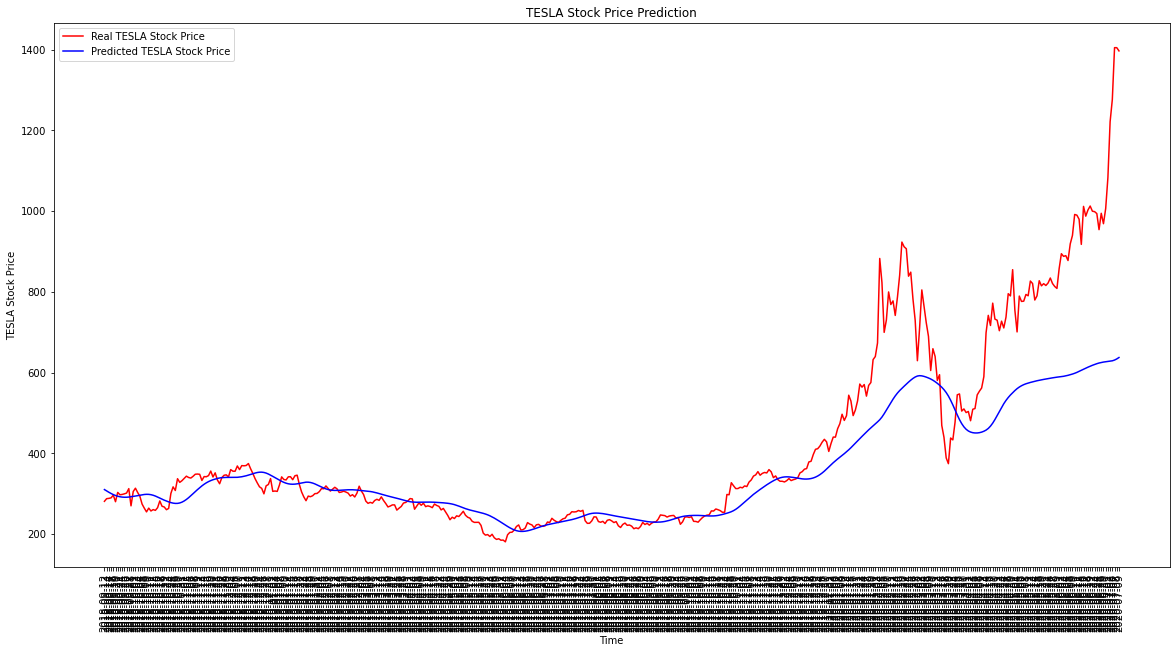

<Figure size 432x288 with 0 Axes>

In [10]:
# Visualising the results
fig=plt.figure(figsize=(20,10))
plt.plot(df.loc[800:, 'Date'],dataset_test.values, color = 'red', label = 'Real TESLA Stock Price')
plt.plot(predicted_stock_price, color = 'blue', label = 'Predicted TESLA Stock Price')
plt.xticks(np.arange(0,459,1),rotation = 90)
plt.title('TESLA Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('TESLA Stock Price')
plt.legend()
#ax.xaxis.set_major_locator(ticker.MultipleLocator(base=10))
plt.show()
plt.savefig("Figure1.png",
            bbox_inches='tight',               
            pad_inches=0.0)

In [14]:
import csv

with open('result_0908.csv', 'w', newline='') as csvfile:
  writer = csv.writer(csvfile)

  # 寫入二維表格
  writer.writerows(predicted_stock_price)

In [4]:
np.savetxt('result_0908.csv', predicted_stock_price, delimiter = ',')

PermissionError: [Errno 13] Permission denied: 'result_0908.csv'